In [25]:
import numpy as np
import scipy.io as sp
from matplotlib import pyplot as plt


# Projeto 4 - Sinais e Sistemas em Tempo Discreto - 2023/01
# Identificação 
## Nome: Yan Tavares de Oliveira
## Matrícula: 202014323

# Funções utilizadas.

Coloque abaixo as funções desenvolvidas para este projeto.

In [26]:
#Código das funções utilizadas.

# Questão 1

Considere um sinal $x\left[n\right]$ com 16 amostras:

$$
x\left[n\right] = \left\{ 1, 2, 3, 4, 5, 6, 7, 8, 8, 7, 6, 5, 4, 3, 2, 1\right\}
$$


## Questão 1a (1.0 ponto)

Calcule a DFT do sinal através da equação:

$$
X\left[k\right] = \sum_{n = 0}^{N-1} x\left[n\right] W_{N}^{kn}
$$

com $W_{N} = e^{-\frac{2 \pi}{N}}$.

In [27]:
# Definindo o sinal
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 8, 7, 6, 5, 4, 3, 2, 1])

# Número de amostras
N = len(x)

# Cálculo da DFT
X = []
for k in range(N):
    W_N_kn = np.exp(-2j * np.pi * k * np.arange(N) / N)
    X_k = np.sum(x * W_N_kn)
    X.append(X_k)

# Normalização da DFT
X = np.array(X)

print(X)



[ 7.20000000e+01+0.00000000e+00j -2.52741424e+01-5.02733949e+00j
  3.87433821e-15-4.55531587e-16j -2.23982881e+00-1.49660576e+00j
 -1.42108547e-14+0.00000000e+00j -4.46462692e-01-6.68178638e-01j
 -1.42875499e-14+3.40736424e-15j -3.95661299e-02-1.98912367e-01j
  0.00000000e+00-1.11479998e-14j -3.95661299e-02+1.98912367e-01j
 -7.27366155e-15-2.02632709e-14j -4.46462692e-01+6.68178638e-01j
 -5.32907052e-14-1.42108547e-14j -2.23982881e+00+1.49660576e+00j
  2.53931816e-14+1.20213343e-14j -2.52741424e+01+5.02733949e+00j]


## Questão 1b (1.0 ponto)

Considere a separação do sinal $x\left[n\right]$ em suas amostras pares e ímpares, $x_e\left[n\right]$ e $x_o\left[n\right]$, respectivamente. 

Calcule a DFT do sinal $x\left[n\right]$ através da equação:

$$
\hat{X}\left[k\right] = X_e\left[k\right] + W_{N}^{k} X_o\left[k\right]
$$

Compare as duas DFTs e calcule o erro médio absoluto (MAE) entre as DFTs calculadas pelas duas formas:

$$
MAE = \sum_{i = 0}^{N-1} \left| X\left[i\right] - \hat{X}\left[i\right]\right|
$$

In [28]:
# Separando amostras pares e ímpares
x_even = x[::2]
x_odd = x[1::2]

# Cálculo das DFTs das amostras pares e ímpares
X_even = []
X_odd = []
for k in range(N//2):  # Apenas metade do número de amostras, pois o sinal foi dividido em duas partes
    W_N_kn = np.exp(-2j * np.pi * k * np.arange(N//2) / (N//2))
    X_even_k = np.sum(x_even * W_N_kn)
    X_odd_k = np.sum(x_odd * W_N_kn)
    X_even.append(X_even_k)
    X_odd.append(X_odd_k)
X_even = np.array(X_even)
X_odd = np.array(X_odd)

# Cálculo da DFT usando a decomposição em amostras pares e ímpares
X_hat = np.zeros(N, dtype=complex)
X_hat[:N//2] = X_even + np.exp(-1j * 2 * np.pi * np.arange(N//2) / N) * X_odd
X_hat[N//2:] = X_even - np.exp(-1j * 2 * np.pi * np.arange(N//2) / N) * X_odd

# Cálculo do erro médio absoluto (MAE)
MAE = np.sum(np.abs(X - X_hat))

print(f"Erro Médio Absoluto (MAE): {MAE}")


Erro Médio Absoluto (MAE): 4.2304897696081136e-13


# Questão 2

O arquivo "potencia.txt" contém dados da envoltória real de um tom senoidal amostrado a uma taxa de $200$ amostras / segundo. Para a separação do desvanecimento em larga escala é necessário filtrar esse sinal com um filtro passa-baixas com frequência de corte em torno de $5$ Hz.


## Questão 2a (1.0  ponto)

Projete um filtro digital com a especificação desejada. Podem ser utilizadas as funções de design de filtro da PySDR (https://pysdr.org/content/filters.html), da própria biblioteca scipy (https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html) ou mesmo bibliotecas web (http://t-filter.engineerjs.com/) . Plote a resposta em frequência e a resposta ao impulso do filtro projetado. 

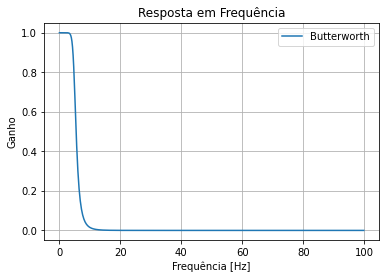

AttributeError: 'numpy.ndarray' object has no attribute 'lfilter'

In [29]:
from scipy.signal import butter, freqz
import matplotlib.pyplot as plt
import numpy as np

# Definindo os parâmetros do filtro
fs = 200.0  # taxa de amostragem
fc = 5.0    # frequência de corte
order = 6   # ordem do filtro

# Projeto do filtro
b, a = butter(order, fc / (fs / 2), btype='low')

# Resposta em frequência
w, h = freqz(b, a, fs=fs)
plt.figure()
plt.plot(w, abs(h), label="Butterworth")
plt.title("Resposta em Frequência")
plt.xlabel("Frequência [Hz]")
plt.ylabel("Ganho")
plt.grid(True)
plt.legend()
plt.show()

signal = np.loadtxt("potencia.txt")

# Resposta ao impulso
impulse = np.zeros(100)
impulse[0] = 1
response = signal.lfilter(b, a, impulse)
plt.figure()
plt.stem(response)
plt.title("Resposta ao Impulso")
plt.xlabel("Amostras")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


## Questão 2b (1.0 ponto)

Escreva uma função para processar uma janela de $N$ amostras do sinal desejado. $N$ deve ser escolhido em torno de 1 segundo de sinal, aproximadamente. A filtragem deve ser feita no domínio da DFT (pode ser utilizada alguma função para cálculo da fft em Python, como a função fft da biblioteca numpy).

In [ ]:
def process_signal_window(signal_window, fs=200.0, fc=5.0, order=4):
    # taxa de amostragem (Hz), frequência de corte (Hz), ordem do filtro
    nyq = 0.5 * fs
    cutoff_norm = fc / nyq
    b, a = signal.butter(order, cutoff_norm, btype='low', analog=False)
    
    # resposta ao impulso do filtro
    t, imp_resp = signal.dimpulse((b, a, 1))
    imp_resp = imp_resp[0].ravel()

    # resposta em frequência do filtro via FFT
    N = len(signal_window)
    freq_resp = np.fft.rfft(imp_resp, n=N)

    # processamento da janela de sinal
    signal_fft = np.fft.rfft(signal_window)    # FFT da janela de sinal
    filtered_fft = signal_fft * freq_resp      # filtragem no domínio da frequência
    filtered_signal = np.fft.irfft(filtered_fft)  # IFFT para voltar ao domínio do tempo

    return filtered_signal

## Questão 2c (1.0  ponto)

Escreva uma função para combinar a saída do processamento de cada janela na saída do sistema, utilizando **um** dos métodos vistos (*overlap and add* ou *overlap and save*). Indique claramente o método escolhido.


In [ ]:
def overlap_and_add(signal, window_size, processing_func):
    # cálculo do tamanho do overlap
    overlap_size = window_size // 2

    # inicialização do sinal de saída
    output = np.zeros(len(signal))

    # processamento por janela e combinação usando overlap and add
    for i in range(0, len(signal) - window_size, window_size - overlap_size):
        signal_window = signal[i:i+window_size]
        processed_window = processing_func(signal_window)

        # adicionando a janela processada à saída
        output[i:i+window_size] += processed_window

    return output


## Questão 2d (1.0  ponto)

Plote o sinal de entrada e saída do sistema dado tanto pelo processamento em janelas como pelo processamento do sinal completo. Pode ser utilizada alguma função da biblioteca do python para calcular a saída do sistema usando o sinal completo.

In [ ]:
#Resposta da questão 2d

# Questão 3

A equação diferença para um filtro FIR de tamanho $N$ pode ser escrita como:

$$
\begin{align}
	y\left[n\right] &= h_0 x\left[n\right] + h_1 x\left[n-1\right] + h_2 x\left[n-2\right] + h_3 \left[n-3\right] + \ldots + h_{N-1} x\left[n - \left(N- 1\right)\right] \\
	       &= \sum_{k=0}^{N-1} h_k x\left[n - k\right] 
\end{align}
$$

Os coeficientes do filtro, ou \textit{taps}, são expressados usando a variável $h_k$ para enfatizar que os próprios coeficientes representam a resposta ao impulso do filtro. A resposta em frequência do filtro é:

$$
\begin{align}
	H\left( \Omega \right) = \frac{Y\left( \Omega \right)}{X\left( \Omega \right)} = \sum_{k=0}^{N-1} h_k e^{-j \Omega k}
\end{align}
$$

Como $H\left( \Omega \right)$ é uma função com período $2 \pi$ da variável contínua $\Omega$, é suficiente especificar $H\left( \Omega \right)$ em apenas um período $0 \leq \Omega < 2 \pi$. 

Em muitas aplicações, a resposta em magnitude desejada do filtro $\left|H_d \left( \Omega \right)\right|$ é conhecida, mas não os coeficientes $h_k$ do filtro. A questão é, então, determinar os coeficientes do filtro a partir da resposta em magnitude desejada. Podemos fazer isso simplesmente amostrando a resposta em frequência desejada $\left|H_d \left( \Omega \right)\right|$ com $N$ amostras em um período, e então fazendo a DFT inversa dessas amostras (obtendo $h\left[n\right]$). Note que a definição dos coeficientes $h_k$ é suficiente para determinar o sistema do filtro FIR. Além disso, como $H \left( \Omega \right)$ foi obtido amostrando $\left|H_d \left( \Omega \right)\right|$ para algumas frequências, garantimos que a resposta em frequência do filtro projeto será igual a resposta em frequência desejada ao menos nos valores de amostragem. Finalmente, observe que, ao fazer a DFT inversa, alguns coeficientes $h_k$ podem ter uma pequena componente imaginária que deve ser descartada para o projeto de um filtro real. 



## Questão 3a (1.0  ponto)

Considere então um sinal de ECG amostrado a uma taxa de $500$ Hz. Projete um filtro digital FIR através da amostragem de frequência passa-baixas com frequência de corte igual a $50$ Hz. 

Plote a resposta ao impulso $h\left[n\right]$ e a resposta em frequência $H\left(\Omega\right)$ do filtro para $N = 21$, $N = 31$ e $N = 41$. Compare os filtros com a resposta em frequência desejada. 

In [ ]:
#Resposta da questão 3a

## Questão 3b (1.0  ponto)

A resposta ao impulso do filtro do item anterior deveria ser uma função *sinc*, que é uma função com suporte infinito. Porém, a amostragem amostra apenas a parte para $n$ positivo, gerando uma descontinuidade e uma resposta em frequência mais pobre. Uma forma de melhorar essa amostragem é centralizar a função *sinc* - para isso, devemos multiplicar a resposta em frequência do filtro $H\left(\Omega\right)$ por $e^{-j \Omega \frac{\left(N - 1\right)}{2}}$. Utilize essa técnica para gerar novos filtros com $N = 21$, $N = 31$ e $N = 41$. Compare os filtros com os filtros do item anterior com o mesmo tamanho.

In [ ]:
#Resposta da questão 3b

## Questão 3c (1.0  ponto)

Aplique o filtro com $N = 41$ no sinal do arquivo "noisy\_ecg\_data\_3.mat". Compare o sinal de entrada com o sinal de saída. O que acontece com os picos do ECG? 

In [ ]:
#Resposta da questão 3c

sinal = sp.loadmat('noisy_ecg_data_3.mat')['noisy_ecg_3'].ravel()

## Questão 3d (1.0  ponto)

Utilize a técnica de *zero-phase filtering* com o filtro do item anterior. Compare a saída do sistema com e sem a aplicação da técnica.

In [ ]:
#Resposta da questão 3d